fetch dataset -->image processing --> train test split data-->feed into CNN-->evaluation

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [5]:
#API to fetch the sataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 25.1MB/s]
100% 163M/163M [00:08<00:00, 20.6MB/s]


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset= '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip :
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print (with_mask_files[0:5])
print (with_mask_files[-5:])

['with_mask_950.jpg', 'with_mask_649.jpg', 'with_mask_2050.jpg', 'with_mask_2370.jpg', 'with_mask_3510.jpg']
['with_mask_2020.jpg', 'with_mask_720.jpg', 'with_mask_2519.jpg', 'with_mask_2123.jpg', 'with_mask_3437.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print (without_mask_files[0:5])
print (without_mask_files[-5:])

['without_mask_2240.jpg', 'without_mask_2994.jpg', 'without_mask_2212.jpg', 'without_mask_1144.jpg', 'without_mask_1321.jpg']
['without_mask_3182.jpg', 'without_mask_2430.jpg', 'without_mask_2918.jpg', 'without_mask_798.jpg', 'without_mask_1987.jpg']


In [10]:
print('Number of with mask images : ', len(with_mask_files))
print('Number of without mask images : ', len(without_mask_files))

Number of with mask images :  3725
Number of without mask images :  3828


**creating labels for the two class of images**

with mask --> 1
without mask --> 0

In [11]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
 labels = with_mask_labels + without_mask_labels
 print(len(labels))
 print (labels[0:5])
 print (labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images, #reads the image as numpy array and step 2 is display as a plot

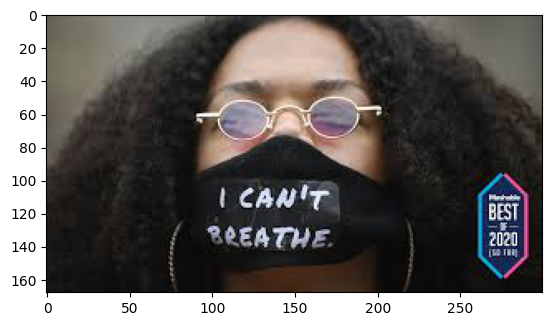

In [13]:
#displaying the with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_3110.jpg')
imgplot = plt.imshow(img)
plt.show()

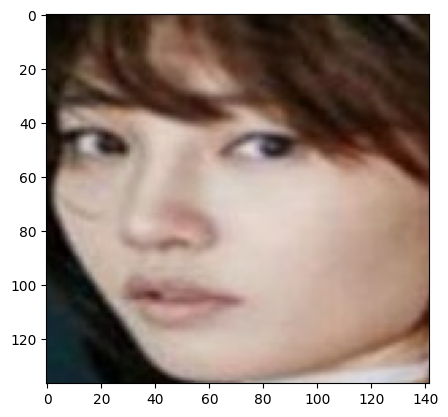

In [14]:
#displaying the without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_2001.jpg')
imgplot = plt.imshow(img)
plt.show()

**IMAGE PROCESSING**

1. resize the image
2. convert the images into numpy arrays

In [15]:
#convert images into numpy arrays 
#open is for reading those images with the help pf PIL that has been imported
# cannot train neural model if some are bw and some are colored so convert all of them to rgb
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

  without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image) 


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [29]:
len(data)

7553

In [24]:
type(data)

list

In [25]:
data[0]

array([[[132, 109, 107],
        [154, 130, 128],
        [191, 166, 164],
        ...,
        [ 47,  47,  50],
        [ 61,  61,  61],
        [ 52,  51,  49]],

       [[146, 122, 118],
        [191, 166, 163],
        [182, 156, 153],
        ...,
        [ 46,  44,  46],
        [ 63,  61,  60],
        [ 55,  54,  51]],

       [[187, 161, 157],
        [170, 143, 139],
        [130, 102,  99],
        ...,
        [ 48,  45,  46],
        [ 61,  58,  57],
        [ 60,  58,  57]],

       ...,

       [[173, 195, 207],
        [186, 208, 218],
        [195, 211, 219],
        ...,
        [124, 168, 197],
        [140, 179, 207],
        [154, 189, 216]],

       [[182, 202, 214],
        [191, 211, 220],
        [200, 214, 224],
        ...,
        [120, 167, 198],
        [132, 173, 204],
        [144, 183, 212]],

       [[187, 205, 218],
        [192, 210, 221],
        [199, 213, 223],
        ...,
        [115, 165, 198],
        [119, 165, 196],
        [132, 175, 204]]

In [26]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type (X)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)



(7553, 128, 128, 3)
(7553,)


Train Test Split

In [18]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2 )

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [20]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
X_train[0]

array([[[81, 70, 74],
        [78, 67, 71],
        [79, 69, 74],
        ...,
        [29, 13,  1],
        [43, 27, 12],
        [63, 50, 34]],

       [[85, 74, 78],
        [82, 70, 74],
        [76, 65, 69],
        ...,
        [23,  7,  0],
        [29, 13,  2],
        [46, 33, 16]],

       [[82, 70, 72],
        [74, 62, 63],
        [67, 55, 56],
        ...,
        [32, 16,  3],
        [33, 18,  4],
        [32, 19,  3]],

       ...,

       [[ 6,  5,  0],
        [ 7,  6,  3],
        [ 4,  3,  0],
        ...,
        [ 6,  5,  2],
        [ 4,  3,  1],
        [ 4,  3,  0]],

       [[16, 16,  8],
        [ 8,  7,  1],
        [ 2,  1,  0],
        ...,
        [ 7,  6,  1],
        [ 5,  4,  0],
        [ 4,  3,  0]],

       [[17, 17,  9],
        [12, 11,  6],
        [10,  9,  4],
        ...,
        [ 4,  3,  0],
        [ 6,  5,  0],
        [ 7,  3,  0]]], dtype=uint8)

In [22]:
X_train_scaled[0]

array([[[0.31764706, 0.2745098 , 0.29019608],
        [0.30588235, 0.2627451 , 0.27843137],
        [0.30980392, 0.27058824, 0.29019608],
        ...,
        [0.11372549, 0.05098039, 0.00392157],
        [0.16862745, 0.10588235, 0.04705882],
        [0.24705882, 0.19607843, 0.13333333]],

       [[0.33333333, 0.29019608, 0.30588235],
        [0.32156863, 0.2745098 , 0.29019608],
        [0.29803922, 0.25490196, 0.27058824],
        ...,
        [0.09019608, 0.02745098, 0.        ],
        [0.11372549, 0.05098039, 0.00784314],
        [0.18039216, 0.12941176, 0.0627451 ]],

       [[0.32156863, 0.2745098 , 0.28235294],
        [0.29019608, 0.24313725, 0.24705882],
        [0.2627451 , 0.21568627, 0.21960784],
        ...,
        [0.1254902 , 0.0627451 , 0.01176471],
        [0.12941176, 0.07058824, 0.01568627],
        [0.1254902 , 0.0745098 , 0.01176471]],

       ...,

       [[0.02352941, 0.01960784, 0.        ],
        [0.02745098, 0.02352941, 0.01176471],
        [0.01568627, 0

**BUILDING A CONVOLUTIONAL NEURAL NETWORK(CNN)**

tensorflow is the library to build neural networks

In [23]:
import tensorflow as tf
from tensorflow import keras

1 neuron will give the probability of the masked img and the other neuron will give probability for unmasked img

in keras.sequential all our layers are stacked. 1st convolutional layer, next maxpooling layer, next flatten layer, 2 dense layers, 1 output layer with sigmoid as activation function.
This is swtting up the architecture for our neural network, training has not started yet.

In [24]:
num_of_classes=2

model= keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation ='sigmoid'))


Compiling the neural network

In [25]:
#set optimization algorithm and loss function metrics for our neural network

model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics =['acc'])

In [26]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.5755 - acc: 0.7300 - val_loss: 0.3433 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3204 - acc: 0.8768 - val_loss: 0.2446 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2683 - acc: 0.8961 - val_loss: 0.2312 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2249 - acc: 0.9086 - val_loss: 0.2260 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1967 - acc: 0.9253 - val_loss: 0.2225 - val_acc: 0.9223


Model Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy = ', accuracy)

48/48 [==============================] - 1s 15ms/step - loss: 0.2027 - acc: 0.9232
Test accuracy =  0.9232296347618103


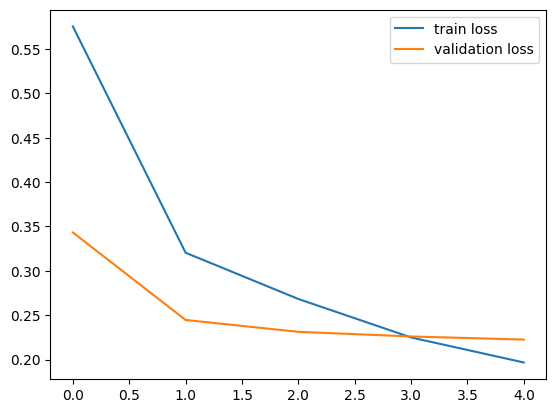

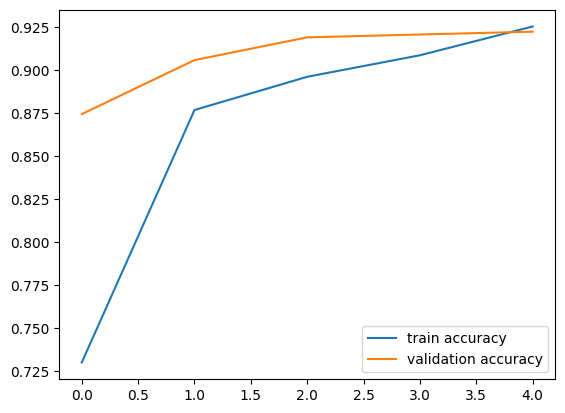

In [29]:
h= history

#plot the loss value
plt.plot(h.history['loss'], label ='train loss')
plt.plot(h.history['val_loss'], label ='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label ='train accuracy')
plt.plot(h.history['val_acc'], label ='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM

Path of the image to be predicted : /content/test3.jpeg


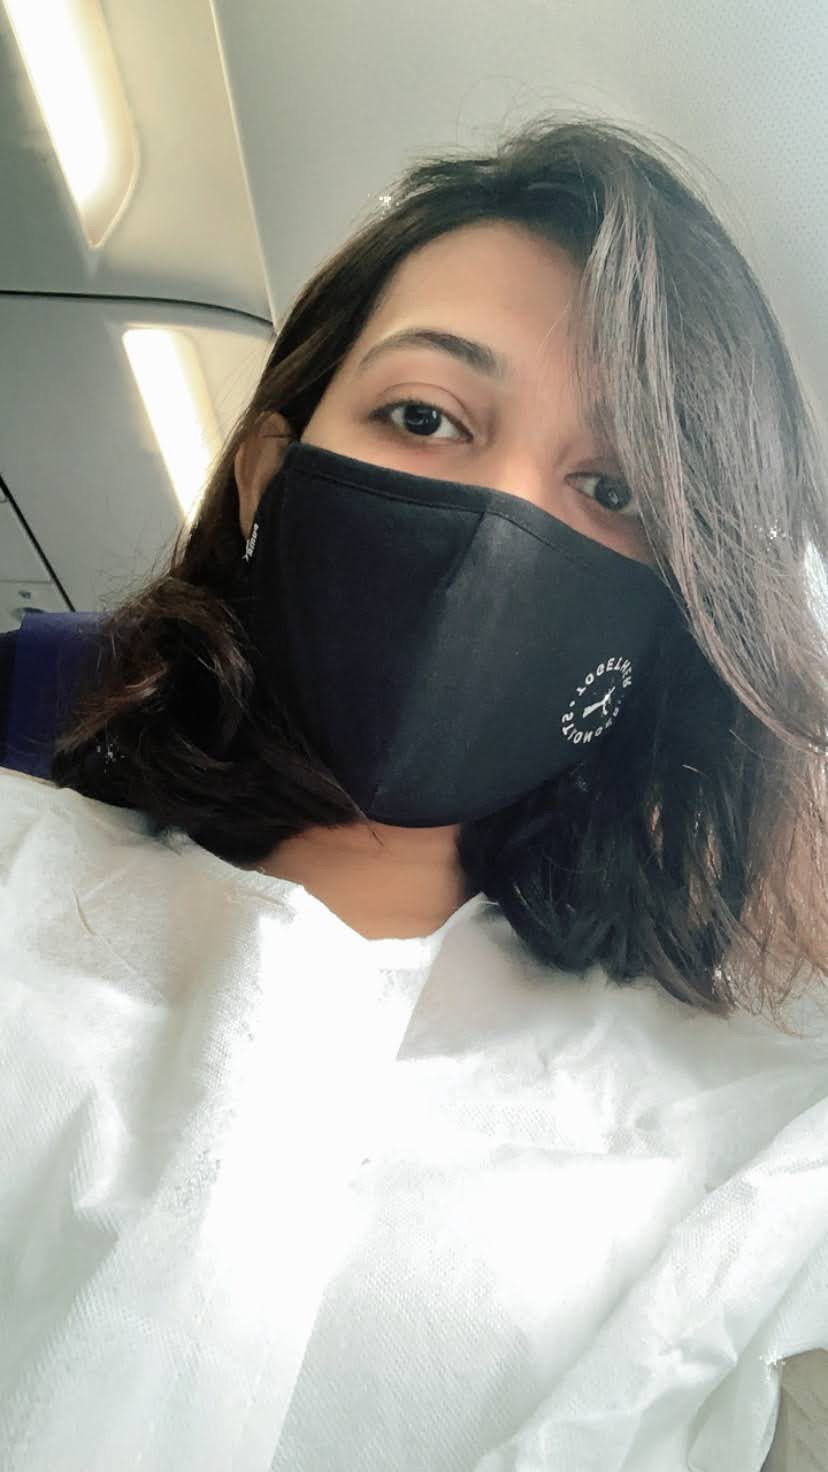

1/1 [==============================] - 0s 30ms/step
[[0.27324402 0.6387787 ]]
1
The person is wearing a mask


In [34]:
input_image_path= input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label= np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==1:
  print('The person is wearing a mask')
else :
  print('The person is not wearing a mask')